<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.835064,89.945358,68.992337,55.438958,0.194936,311.406654,311.358449,0.048204
1,0.0,1.0,64.724313,33.323362,69.631602,78.097750,0.063958,255.840986,255.692801,0.148185
2,0.0,2.0,50.211518,55.542778,80.818767,70.030354,0.151094,266.754509,266.604146,0.150363
3,0.0,3.0,45.175278,30.479705,71.743828,81.793404,-0.599094,238.593121,239.059247,-0.466126
4,0.0,4.0,38.645165,22.585102,90.238555,67.247292,0.522780,229.238895,228.671351,0.567544
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.104310,41.704504,75.701971,99.971224,0.656055,326.138064,325.868556,0.269508
19996,999.0,16.0,43.995566,35.006503,62.454936,82.180074,-0.036445,233.600634,233.844025,-0.243391
19997,999.0,17.0,87.432684,90.447398,80.827013,91.453535,0.089708,360.250337,360.479489,-0.229152
19998,999.0,18.0,76.050260,71.676393,63.753053,40.226713,0.015211,261.721630,261.717585,0.004044


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.835064  89.945358  68.992337  55.438958  0.194936  311.406654   
      1.0    64.724313  33.323362  69.631602  78.097750  0.063958  255.840986   
      2.0    50.211518  55.542778  80.818767  70.030354  0.151094  266.754509   
      3.0    45.175278  30.479705  71.743828  81.793404 -0.599094  238.593121   
      4.0    38.645165  22.585102  90.238555  67.247292  0.522780  229.238895   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   98.104310  41.704504  75.701971  99.971224  0.656055  326.138064   
      16.0   43.995566  35.006503  62.454936  82.180074 -0.036445  233.600634   
      17.0   87.432684  90.447398  80.827013  91.453535  0.089708  360.250337   
      18.0   76.050260  71.676393  63.753053  40.226713  0.015211  261.721630   
      19.0   21.674267  80.285953  84.868616  40.652254  0.018116  237.499206   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    311.358449  0.048204  
      1.0    255.692801  0.148185  
      2.0    266.604146  0.150363  
      3.0    239.059247 -0.466126  
      4.0    228.671351  0.567544  
...                 ...       ...  
999.0 15.0   325.868556  0.269508  
      16.0   233.844025 -0.243391  
      17.0   360.479489 -0.229152  
      18.0   261.717585  0.004044  
      19.0   237.453226  0.045979  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.835064  89.945358  68.992337  55.438958  0.194936  311.406654   
      1.0    64.724313  33.323362  69.631602  78.097750  0.063958  255.840986   
      2.0    50.211518  55.542778  80.818767  70.030354  0.151094  266.754509   
      3.0    45.175278  30.479705  71.743828  81.793404 -0.599094  238.593121   
      4.0    38.645165  22.585102  90.238555  67.247292  0.522780  229.238895   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   98.104310  41.704504  75.701971  99.971224  0.656055  326.138064   
      16.0   43.995566  35.006503  62.454936  82.180074 -0.036445  233.600634   
      17.0   87.432684  90.447398  80.827013  91.453535  0.089708  360.250337   
      18.0   76.050260  71.676393  63.753053  40.226713  0.015211  261.721630   
      19.0   21.674267  80.285953  84.868616  40.652254  0.018116  237.499206   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    311.358449  0.048204  
      1.0    255.692801  0.148185  
      2.0    266.604146  0.150363  
      3.0    239.059247 -0.466126  
      4.0    228.671351  0.567544  
...                 ...       ...  
999.0 15.0   325.868556  0.269508  
      16.0   233.844025 -0.243391  
      17.0   360.479489 -0.229152  
      18.0   261.717585  0.004044  
      19.0   237.453226  0.045979  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.835064,89.945358,68.992337,55.438958,0.194936,311.406654,311.358449,0.048204
1,0.0,1.0,64.724313,33.323362,69.631602,78.097750,0.063958,255.840986,255.692801,0.148185
2,0.0,2.0,50.211518,55.542778,80.818767,70.030354,0.151094,266.754509,266.604146,0.150363
3,0.0,3.0,45.175278,30.479705,71.743828,81.793404,-0.599094,238.593121,239.059247,-0.466126
4,0.0,4.0,38.645165,22.585102,90.238555,67.247292,0.522780,229.238895,228.671351,0.567544
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.104310,41.704504,75.701971,99.971224,0.656055,326.138064,325.868556,0.269508
19996,999.0,16.0,43.995566,35.006503,62.454936,82.180074,-0.036445,233.600634,233.844025,-0.243391
19997,999.0,17.0,87.432684,90.447398,80.827013,91.453535,0.089708,360.250337,360.479489,-0.229152
19998,999.0,18.0,76.050260,71.676393,63.753053,40.226713,0.015211,261.721630,261.717585,0.004044


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    86.835064  89.945358  68.992337  55.438958  0.194936  311.406654   
      1.0    64.724313  33.323362  69.631602  78.097750  0.063958  255.840986   
      2.0    50.211518  55.542778  80.818767  70.030354  0.151094  266.754509   
      3.0    45.175278  30.479705  71.743828  81.793404 -0.599094  238.593121   
      4.0    38.645165  22.585102  90.238555  67.247292  0.522780  229.238895   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   98.104310  41.704504  75.701971  99.971224  0.656055  326.138064   
      16.0   43.995566  35.006503  62.454936  82.180074 -0.036445  233.600634   
      17.0   87.432684  90.447398  80.827013  91.453535  0.089708  360.250337   
      18.0   76.050260  71.676393  63.753053  40.226713  0.015211  261.721630   
      19.0   21.674267  80.285953  84.868616  40.652254  0.018116  237.499206   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    311.358449  0.048204  
      1.0    255.692801  0.148185  
      2.0    266.604146  0.150363  
      3.0    239.059247 -0.466126  
      4.0    228.671351  0.567544  
...                 ...       ...  
999.0 15.0   325.868556  0.269508  
      16.0   233.844025 -0.243391  
      17.0   360.479489 -0.229152  
      18.0   261.717585  0.004044  
      19.0   237.453226  0.045979  

[20000 rows x 8 columns]

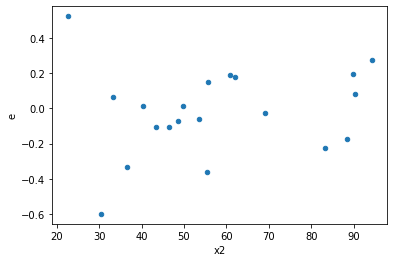

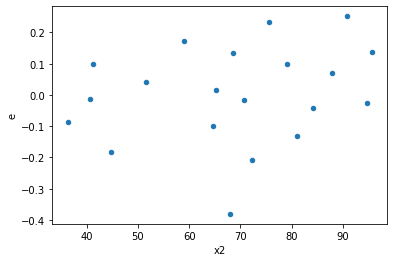

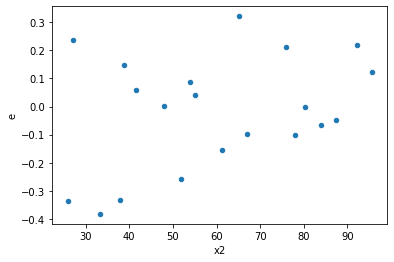

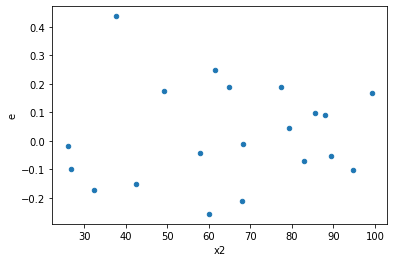

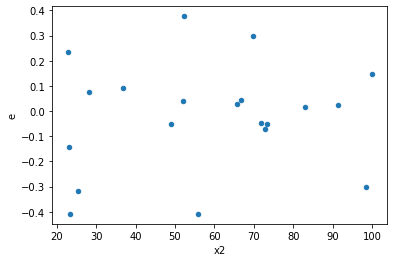

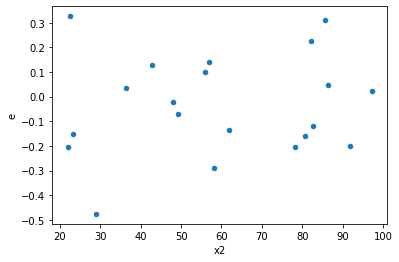

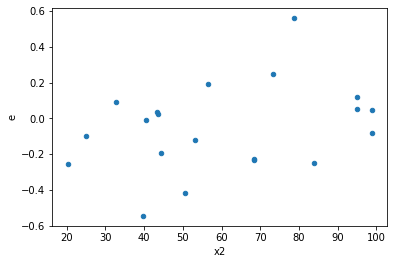

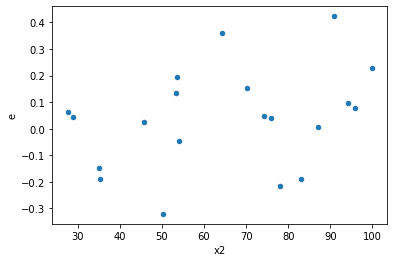

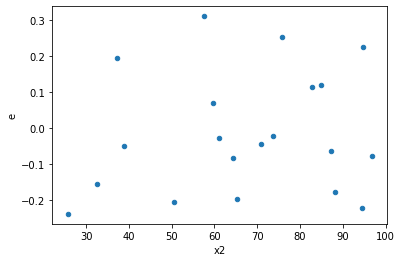

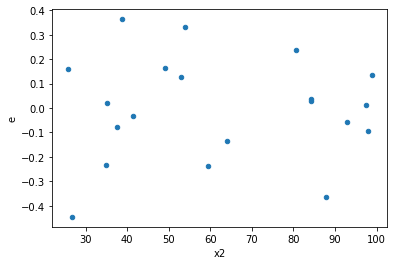

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,0.04340022236660644,0.14259526956828703,0.007233370394434407,0.02376587826138117,3.285588455371706,0.17346105586207416,0.9132694720689629,0.08673052793103708,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,0.029170855326628005,0.5792691154161511,0.0048618092211046675,0.09654485256935852,19.857803582721054,0.002048597673054209,0.9989757011634729,0.0010242988365271044,Reject005=0 : Heteroscedasticity
5.0,7.0,5.0,0.1970000838116096,0.20627132619087474,0.02814286911594423,0.04125426523817495,1.4658869736491262,0.6963540600594116,0.6518229699702942,0.3481770300297058,Reject005=1 : Homoscedasticity
12.0,6.0,6.0,0.04045996478886497,0.10451121378308373,0.006743327464810828,0.017418535630513956,2.583077230256176,0.2730802740532159,0.8634598629733921,0.13654013702660794,Reject005=1 : Homoscedasticity
13.0,4.0,8.0,0.06849923101947836,0.1423660943041633,0.01712480775486959,0.017795761788020413,1.0391802373933239,0.8880816301460355,0.5559591849269823,0.44404081507301774,Reject005=1 : Homoscedasticity
14.0,3.0,9.0,0.012789271675803559,0.323970754617946,0.004263090558601186,0.03599675051310511,8.443815588312633,0.011084810229794684,0.9944575948851027,0.005542405114897342,Reject005=0 : Heteroscedasticity
16.0,2.0,10.0,0.0010326961650471448,0.25558006519682097,0.0005163480825235724,0.025558006519682097,49.49763034806141,1.3001453986749567e-05,0.9999934992730066,6.5007269933747835e-06,Reject005=0 : Heteroscedasticity
18.0,7.0,5.0,0.09228404760524017,0.08084387822299995,0.013183435372177168,0.016168775644599988,1.2264463084275588,0.8508912531698931,0.5745543734150534,0.42544562658494656,Reject005=1 : Homoscedasticity
20.0,5.0,7.0,0.12672322482227782,0.7682181695397698,0.025344644964455564,0.10974545279139569,4.33012389580945,0.08165276380178144,0.9591736180991093,0.04082638190089072,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,3.0,0.7869997492946367,0.012414954975666125,0.08744441658829297,0.004138318325222041,0.04732512934137499,0.00041304305094471414,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,0.04340022236660644,0.14259526956828703,0.007233370394434407,0.02376587826138117,3.285588455371706,0.17346105586207416,Reject005=1 : Homoscedasticity
2.0,8.0,4.0,0.2859188371465719,0.12772055743900435,0.03573985464332149,0.031930139359751086,0.8934042871301296,0.8231367968368177,Reject005=1 : Homoscedasticity
3.0,5.0,7.0,0.245221583104881,0.14430170059751926,0.049044316620976205,0.020614528656788467,0.4203245162146199,0.3570966872049833,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,0.029170855326628005,0.5792691154161511,0.0048618092211046675,0.09654485256935852,19.857803582721054,0.002048597673054209,Reject005=0 : Heteroscedasticity
5.0,7.0,5.0,0.1970000838116096,0.20627132619087474,0.02814286911594423,0.04125426523817495,1.4658869736491262,0.6963540600594116,Reject005=1 : Homoscedasticity
6.0,3.0,9.0,0.20073208703335196,0.31804424104883705,0.06691069567778399,0.03533824900542634,0.5281405109820061,0.6519650332680882,Reject005=1 : Homoscedasticity
7.0,8.0,4.0,0.2215063072776402,0.11658099530062618,0.027688288409705025,0.029145248825156546,1.0526200967677308,0.9668060890986341,Reject005=1 : Homoscedasticity
8.0,9.0,3.0,0.15719269605364677,0.05446780446377888,0.017465855117071865,0.018155934821259625,1.0395102157645433,0.9034724617147738,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      817
Reject005=0 : Heteroscedasticity    183
Name: Result_test, dtype: int64